In [61]:
import numpy as np
import matplotlib as plt
import pandas as pd
import scipy as sp
import sklearn
import xgboost as xgb
import shap
import lime
import lime.lime_tabular

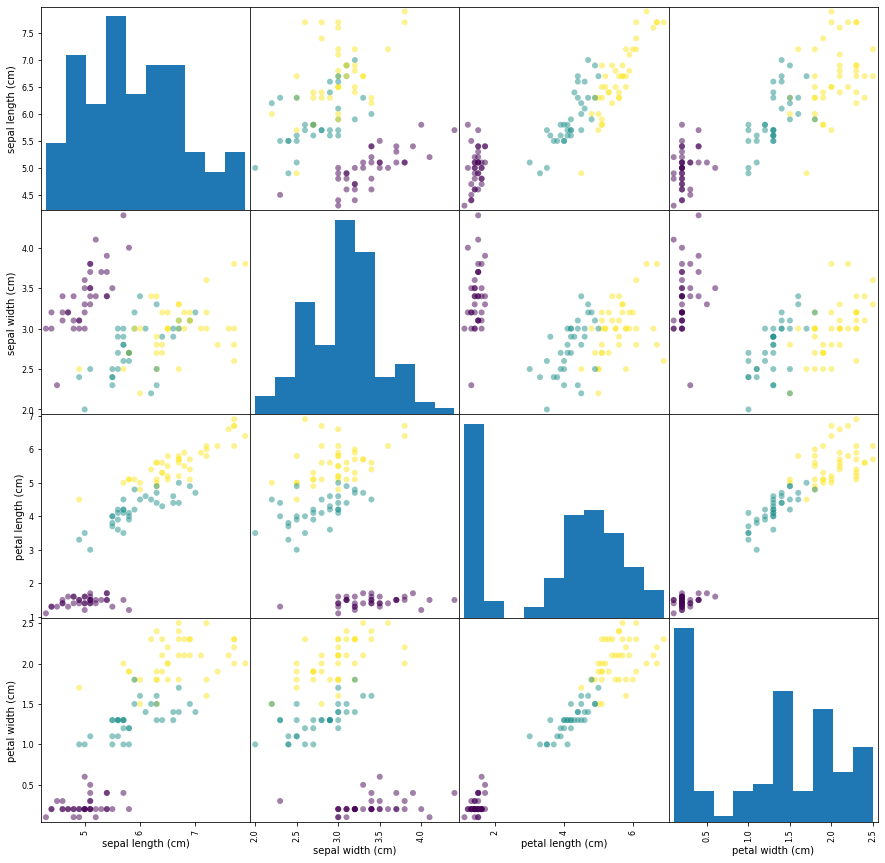

In [62]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
features = iris_dataset.feature_names

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0)

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),marker='o')

In [63]:
xgb_model = xgb.XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test,y_test)

0.9496402511096681

Global SHAP


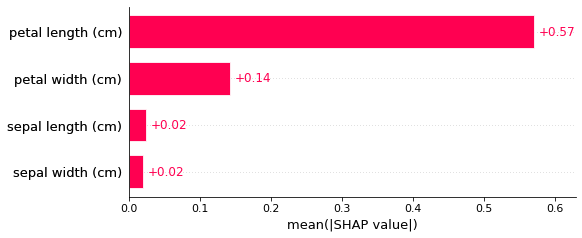

SHAP Class 0


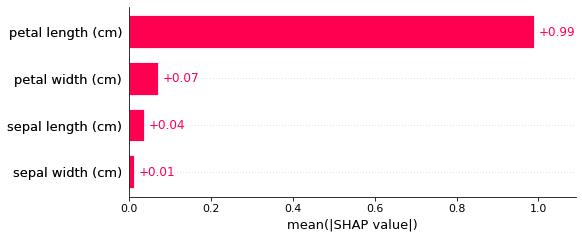

SHAP Class 1


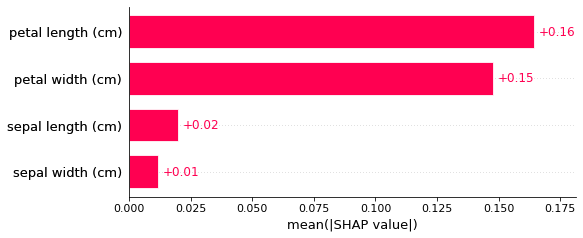

SHAP Class 2


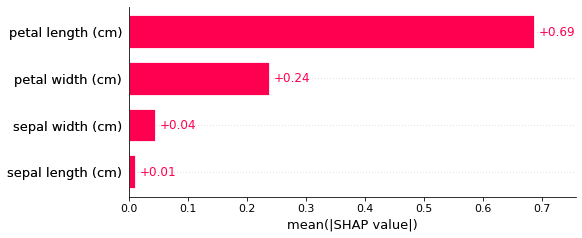

In [64]:
explainer = shap.Explainer(xgb_model,feature_names=features)
shap_values = explainer(X_test)

print('Global SHAP')
shap.plots.bar(shap_values)

X_0 = X_test[y_test == 0]
X_1 = X_test[y_test == 1]
X_2 = X_test[y_test == 2]

shap_values_0 = explainer(X_0)
shap_values_1 = explainer(X_1)
shap_values_2 = explainer(X_2)

shap_values_0 = explainer(X_0)
shap_values_1 = explainer(X_1)
shap_values_2 = explainer(X_2)

print('SHAP Class 0')
shap.plots.bar(shap_values_0)
print('SHAP Class 1')
shap.plots.bar(shap_values_1)
print('SHAP Class 2')
shap.plots.bar(shap_values_2)

1.9981338
2
Intercept 0.8457477592181444
Prediction_local [1.61326191]
Right: 1.9981338


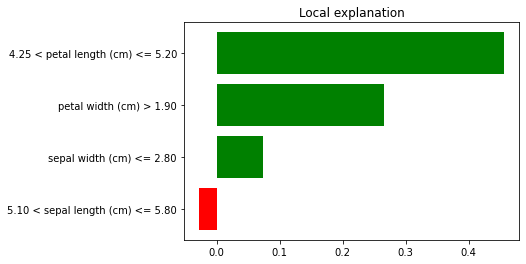

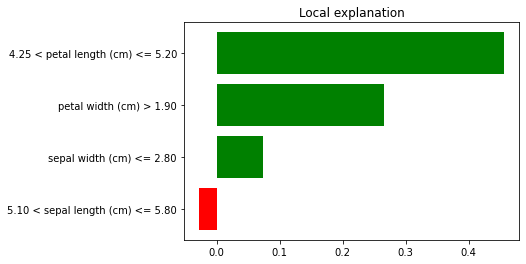

In [65]:
print(xgb_model.predict(X_test)[0])
print(y_test[0])

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=features, verbose=True, mode='regression')
exp = explainer.explain_instance(X_test[0], xgb_model.predict, num_features=10)
exp.as_pyplot_figure()